This module tests the python wrapper for cfftlog

The tests contain:
- integrals with 1 spherical Bessel function;
- integrals with 1 1st-derivative of spherical Bessel function;
- integrals with 1 2nd-derivative of spherical Bessel function;
- integrals with 1 spherical Bessel function squared;
- integrals with 1 (cylindrical) Bessel function, i.e. Hankel transform;

by Xiao Fang  
Oct 25, 2021

In [1]:
import numpy as np
from fftlogx import hankel, fftlog

import matplotlib.pyplot as plt

In [2]:
k, pk = np.loadtxt('Pk_test', usecols=(0, 1), unpack=True)
N = k.size
print('number of input data points: '+str(N))
ell = 100.
nu = 1.01
myfftlog = fftlog(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25, N_pad=5000)

number of input data points: 3000


## Test fftlog

/home/limz/.conda/envs/class/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/limz/.conda/envs/class/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


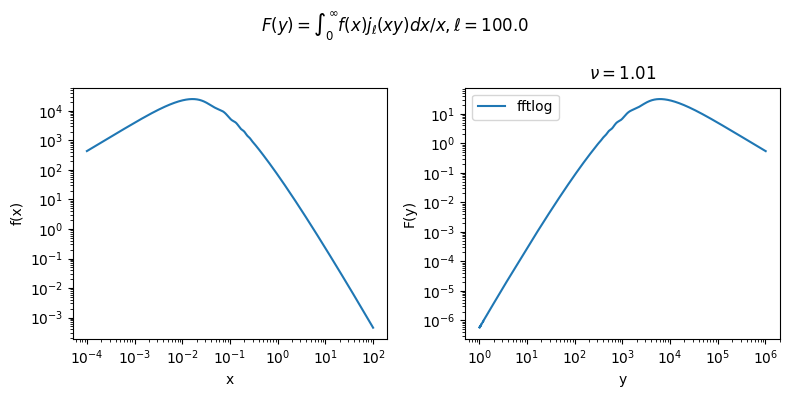

In [3]:
r, Fr = myfftlog.fftlog(ell)
fig = plt.figure(figsize=(8, 4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)j_{\ell}(xy) dx/x, \ell=$%.1f' % (ell))

subfig1 = fig.add_subplot(1, 2, 1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1, 2, 2)
subfig2.set_title(r'$\nu=$%.2f' % (nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r, Fr, label='fftlog')

# r_c, Fr_c = np.loadtxt('../cfftlog/test_output.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_c, Fr_c, label='(bad) brute-force')

# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test 1st & 2nd-derivative

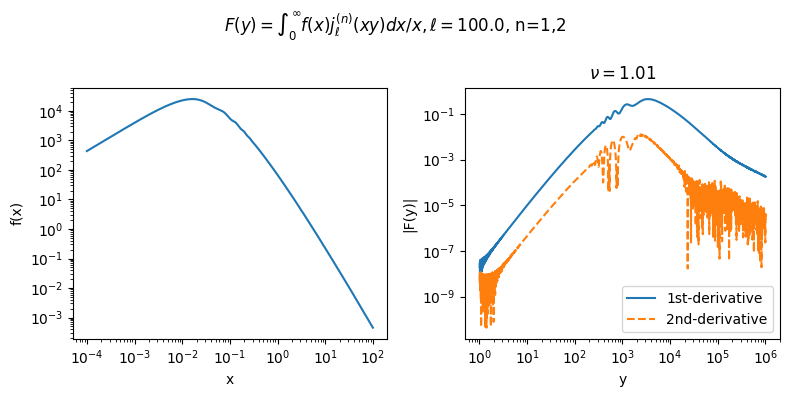

In [4]:
r1, Fr1 = myfftlog.fftlog_dj(ell)
r2, Fr2 = myfftlog.fftlog_ddj(ell)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)j_{\ell}^{(n)}(xy) dx/x, \ell=$%.1f, n=1,2'%(ell))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('|F(y)|')
subfig2.plot(r1, abs(Fr1), label="1st-derivative")
subfig2.plot(r2, abs(Fr2), '--', label='2nd-derivative')
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test j squared

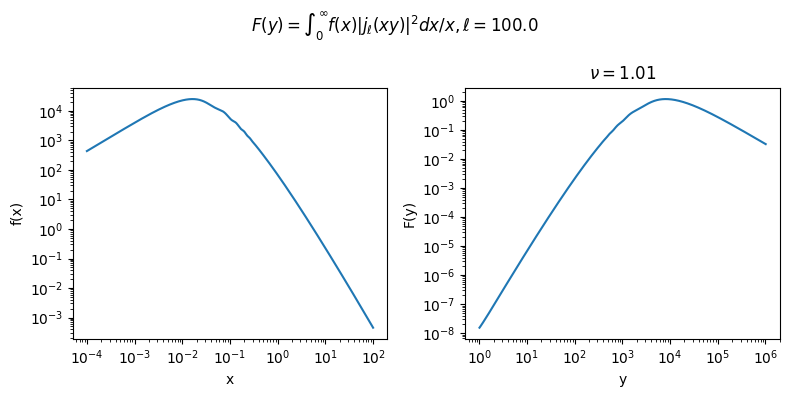

In [5]:
r1, Fr1 = myfftlog.fftlog_jsqr(ell)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)|j_{\ell}(xy)|^2 dx/x, \ell=$%.1f'%(ell))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r1, Fr1)
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
# plt.legend()
plt.tight_layout()
plt.show()

## Test hankel

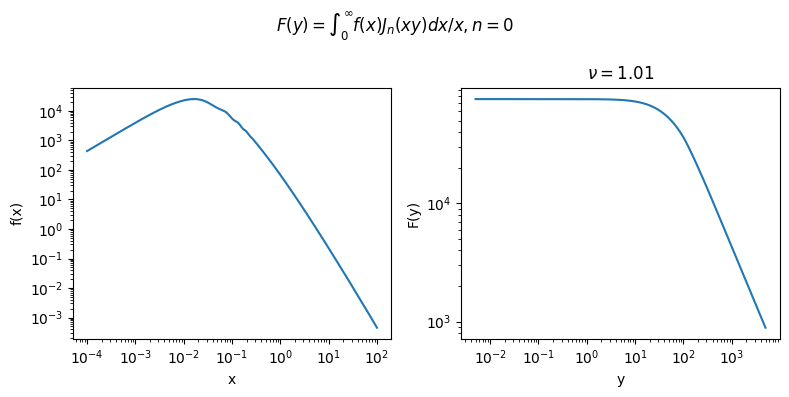

In [6]:
n = 0
nu = 1.01
myhankel = hankel(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25)
r, Fr = myhankel.hankel(n)

fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)J_{n}(xy) dx/x, n=$%d'%(n))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r, Fr)
plt.tight_layout()
plt.show()

## Test on different $\ell$

In [7]:
k, pk = np.loadtxt('Pk_test', usecols=(0,1), unpack=True)
N = k.size
print('number of input data points: '+str(N))
ell_ar = np.arange(100)
nu = 1.01
myfftlog = fftlog(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25, N_pad=5000)

number of input data points: 3000


## Test fftlog 

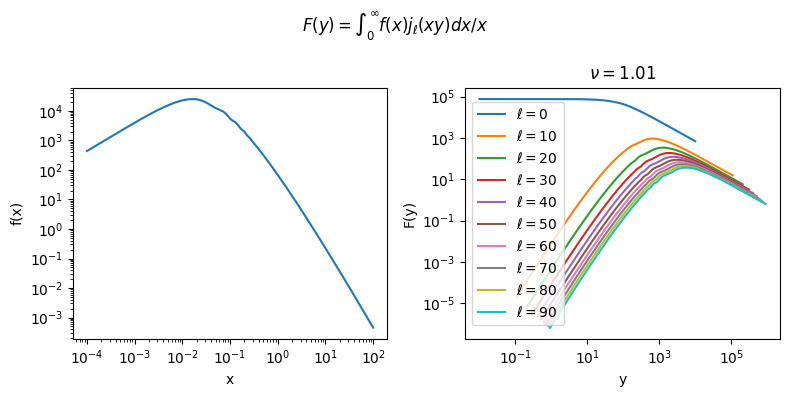

In [9]:
r, Fr = myfftlog.fftlog_ells(ell_ar)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)j_{\ell}(xy) dx/x$')

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
for i in range(10):
	subfig2.plot(r[i*10], Fr[i*10], label=r'$\ell=%d$'%(ell_ar[i*10]))

# r_c, Fr_c = np.loadtxt('../cfftlog/test_output.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_c, Fr_c, label='(bad) brute-force')

# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test 1st derivative

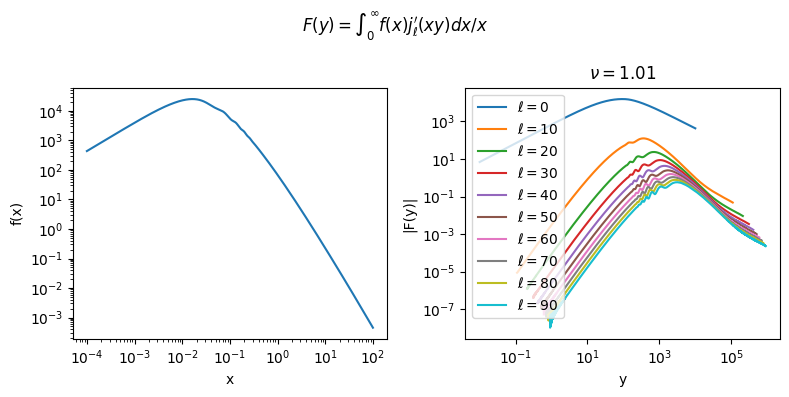

In [10]:
r1, Fr1 = myfftlog.fftlog_dj_ells(ell_ar)
# r2, Fr2 = myfftlog.fftlog_ddj_ells(ell_ar)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r"$F(y) = \int_0^{\infty} f(x)j_{\ell}^{\prime}(xy) dx/x$")

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('|F(y)|')
for i in range(10):
	subfig2.plot(r1[i*10], abs(Fr1[i*10]), label=r"$\ell=%d$"%(ell_ar[i*10]))
	# subfig2.plot(r2[i*10], abs(Fr2[i*10]), '--', label=r'2nd-derivative, $\ell=%d$'%(ell_ar[i*10]))
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test 2nd derivative

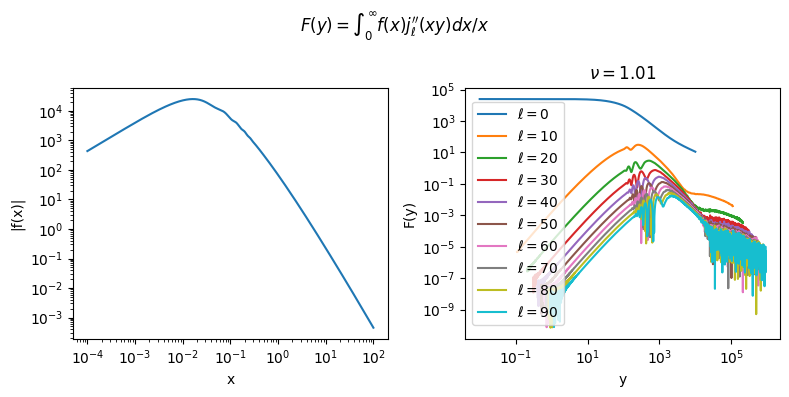

In [11]:
r2, Fr2 = myfftlog.fftlog_ddj_ells(ell_ar)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)j_{\ell}^{\prime\prime}(xy) dx/x$')

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('|f(x)|')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
for i in range(10):
	# subfig2.plot(r1[i*10], abs(Fr1[i*10]), label=r"1st-derivative, $\ell=%d$"%(ell_ar[i*10]))
	subfig2.plot(r2[i*10], abs(Fr2[i*10]), label=r'$\ell=%d$'%(ell_ar[i*10]))
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test j squared

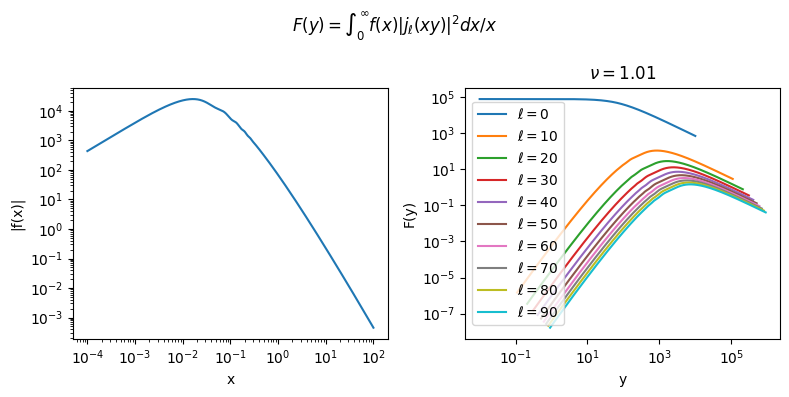

In [12]:
r2, Fr2 = myfftlog.fftlog_jsqr_ells(ell_ar)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)|j_{\ell}(xy)|^2 dx/x$')

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('|f(x)|')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
for i in range(10):
	# subfig2.plot(r1[i*10], abs(Fr1[i*10]), label=r"1st-derivative, $\ell=%d$"%(ell_ar[i*10]))
	subfig2.plot(r2[i*10], Fr2[i*10], label=r'$\ell=%d$'%(ell_ar[i*10]))
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

## Test Hankel

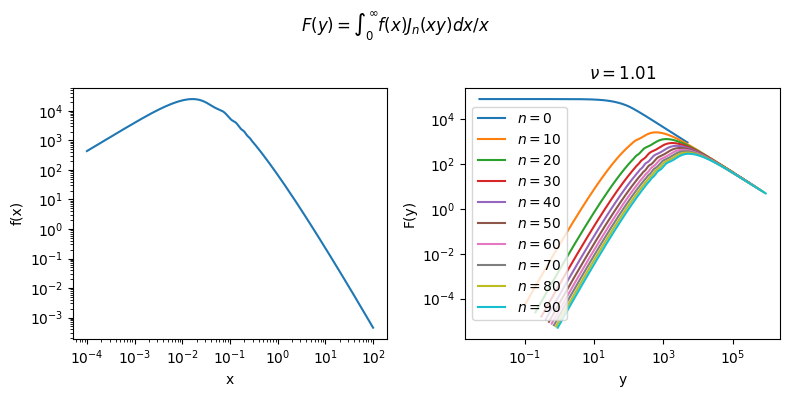

In [13]:
n = np.arange(100)
nu = 1.01
myhankel = hankel(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25)
r, Fr = myhankel.hankel_narray(n)

fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^{\infty} f(x)J_{n}(xy) dx/x$')

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
for i in range(10):
	subfig2.plot(r[i*10], Fr[i*10], label=r"$n=%d$"%(n[i*10]))
plt.legend()
plt.tight_layout()
plt.show()